In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression


## Pull in csv

In [5]:
NSCH_data = pd.read_csv("../../Cleaned Data/filteredNSCH.csv")
NSCH_data.head()

,Survey Year,Special Health Care Needs Status of Child,Child Treatment for Chronic Emotion Develop Behave,Child Needs Treatment for Emotion Develop Behave,Child Special Therapy for Health Condition for 12 Months,Child Special Therapy for Health Condition,Child Special Therapy,Child Sex,Child Age - Years,Childs Age - Years
0,2016,Special Health Care Needs,Yes,Yes,Yes,Yes,Yes,Female,1.0,1
1,2016,Special Health Care Needs,Yes,Yes,Yes,Yes,Yes,Male,15.0,15
2,2016,Special Health Care Needs,Yes,Yes,Yes,Yes,Yes,Female,16.0,16
3,2016,Special Health Care Needs,Yes,Yes,Yes,Yes,Yes,Male,10.0,10
4,2016,Special Health Care Needs,Yes,Yes,Yes,Yes,Yes,Female,8.0,8


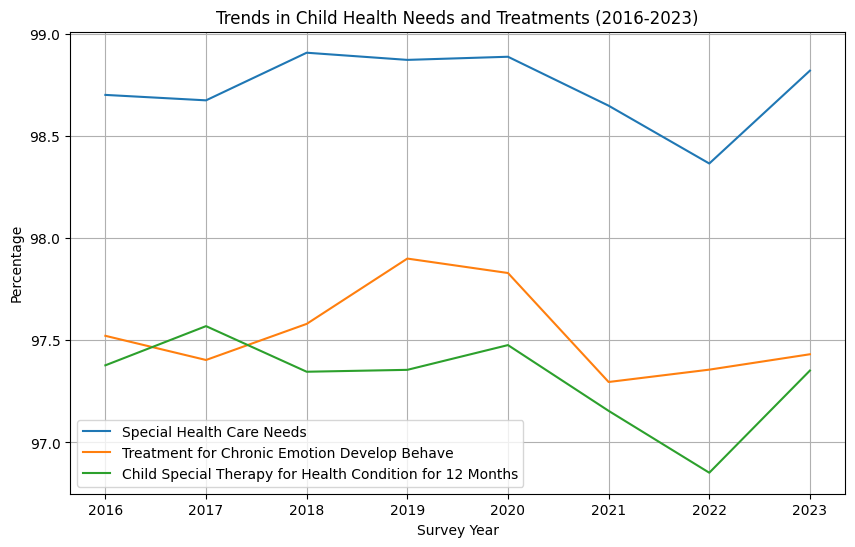

In [61]:
## Claculate percentages
shcn_trend = NSCH_data.groupby('Survey Year')['Special Health Care Needs Status of Child'].apply(lambda x: (x == 'Special Health Care Needs').mean() * 100)
chronic_emotion_treatment_trend = NSCH_data.groupby('Survey Year')['Child Treatment for Chronic Emotion Develop Behave'].apply(lambda x: (x == 'Yes').mean() * 100)
Month12_csthc = NSCH_data.groupby('Survey Year')['Child Special Therapy for Health Condition for 12 Months'].apply(lambda x: (x == 'Yes').mean() * 100)
csthc = NSCH_data.groupby('Survey Year')['Child Special Therapy for Health Condition'].apply(lambda x: (x == 'Yes').mean() * 100)
cst = NSCH_data.groupby('Survey Year')['Child Special Therapy'].apply(lambda x: (x == 'Yes').mean() * 100)

plt.figure(figsize=(10, 6))
plt.plot(shcn_trend, label='Special Health Care Needs')
plt.plot(chronic_emotion_treatment_trend, label='Treatment for Chronic Emotion Develop Behave')
plt.plot(Month12_csthc, label='Child Special Therapy for Health Condition for 12 Months')

plt.title('Trends in Child Health Needs and Treatments (2016-2023)')
plt.xlabel('Survey Year')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.show()

             Special Health Care Needs Status of Child  \
Survey Year                                              
2016                                              4102   
2017                                              1786   
2018                                              2534   
2019                                              2542   
2020                                              3644   
2021                                              4888   
2022                                              5655   
2023                                              6194   

             Child Treatment for Chronic Emotion Develop Behave  \
Survey Year                                                       
2016                                                      4053    
2017                                                      1763    
2018                                                      2500    
2019                                                      2517    
2020             

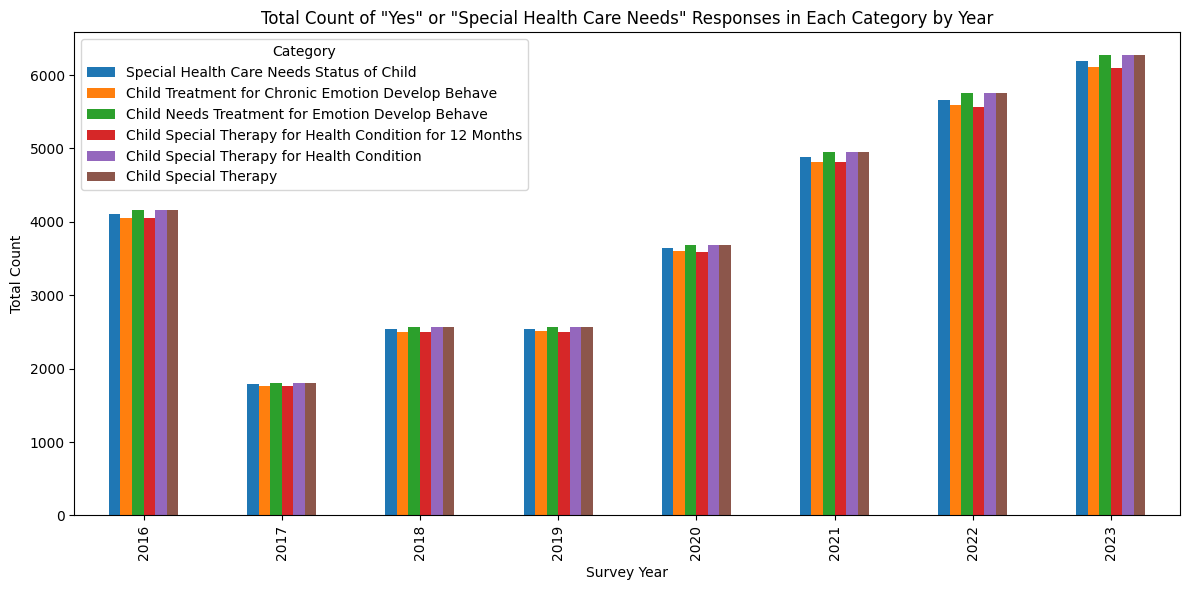

In [62]:
columns_of_interest = [
    'Special Health Care Needs Status of Child', 
    'Child Treatment for Chronic Emotion Develop Behave', 
    'Child Needs Treatment for Emotion Develop Behave',
    'Child Special Therapy for Health Condition for 12 Months', 
    'Child Special Therapy for Health Condition', 
    'Child Special Therapy'
]

yes_count_by_year = {}

for col in columns_of_interest:
    if col == 'Special Health Care Needs Status of Child':
        # For 'Special Health Care Needs Status of Child', filter by 'Special Health Care Needs'
        yes_count_by_year[col] = NSCH_data[NSCH_data[col] == 'Special Health Care Needs'].groupby('Survey Year').size()
    else:
        # For other columns, filter by 'Yes'
        yes_count_by_year[col] = NSCH_data[NSCH_data[col] == 'Yes'].groupby('Survey Year').size()

yes_count_df = pd.DataFrame(yes_count_by_year)

print(yes_count_df)

yes_count_df.plot(kind='bar', figsize=(12, 6))
plt.title('Total Count of "Yes" or "Special Health Care Needs" Responses in Each Category by Year')
plt.xlabel('Survey Year')
plt.ylabel('Total Count')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

--- Survey Year: 2016 ---
                   Special Health Care Needs Status of Child  \
Child Age - Years                                              
0.0                                                       29   
1.0                                                       62   
2.0                                                      112   
3.0                                                      168   
4.0                                                      190   
5.0                                                      207   
6.0                                                      257   
7.0                                                      289   
8.0                                                      294   
9.0                                                      341   
10.0                                                     287   
11.0                                                     305   
12.0                                                     293   
13.0          

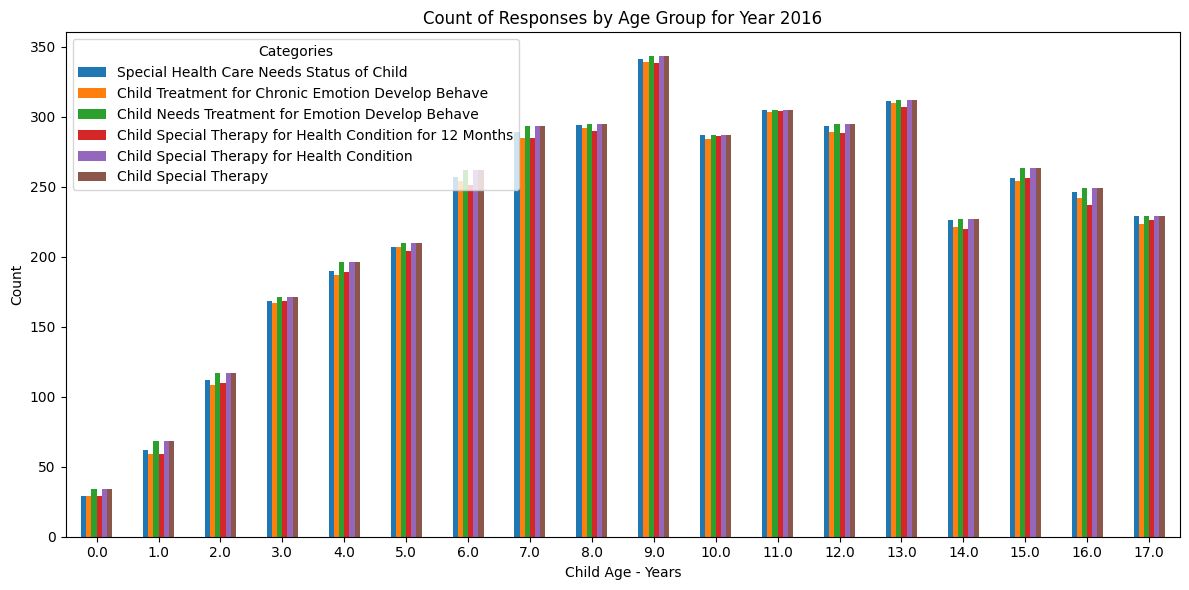

--- Survey Year: 2017 ---
                   Special Health Care Needs Status of Child  \
Child Age - Years                                              
0.0                                                       17   
1.0                                                       22   
2.0                                                       66   
3.0                                                       80   
4.0                                                       95   
5.0                                                      101   
6.0                                                       90   
7.0                                                      113   
8.0                                                      137   
9.0                                                      135   
10.0                                                     134   
11.0                                                     141   
12.0                                                     113   
13.0          

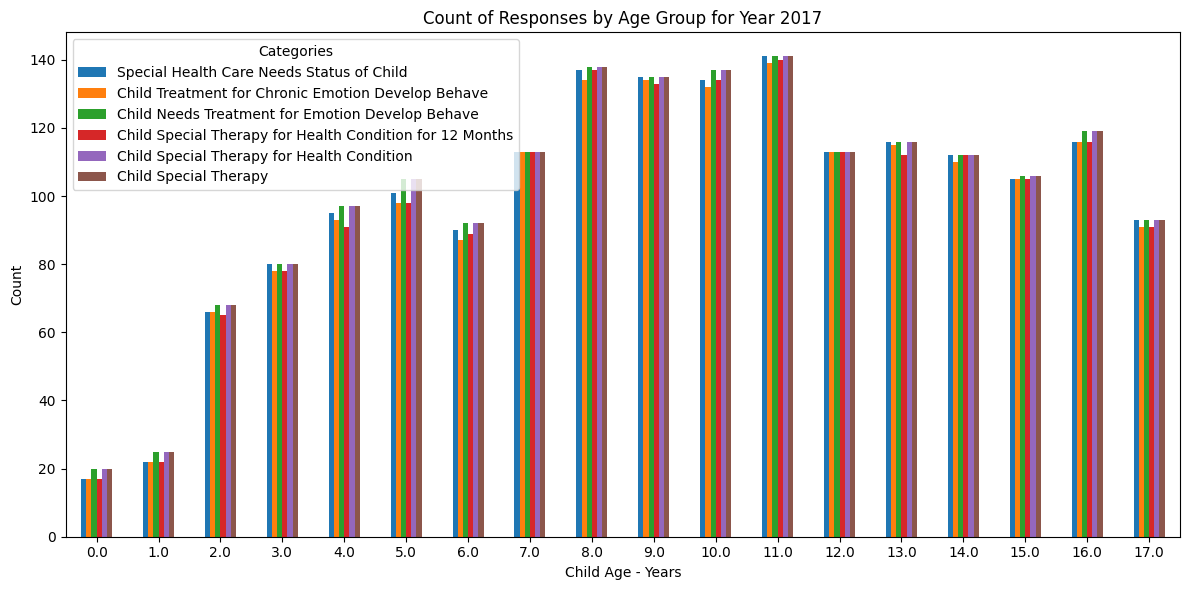

--- Survey Year: 2018 ---
                   Special Health Care Needs Status of Child  \
Child Age - Years                                              
0.0                                                       20   
1.0                                                       38   
2.0                                                       80   
3.0                                                       93   
4.0                                                      124   
5.0                                                      164   
6.0                                                      158   
7.0                                                      190   
8.0                                                      172   
9.0                                                      190   
10.0                                                     205   
11.0                                                     199   
12.0                                                     152   
13.0          

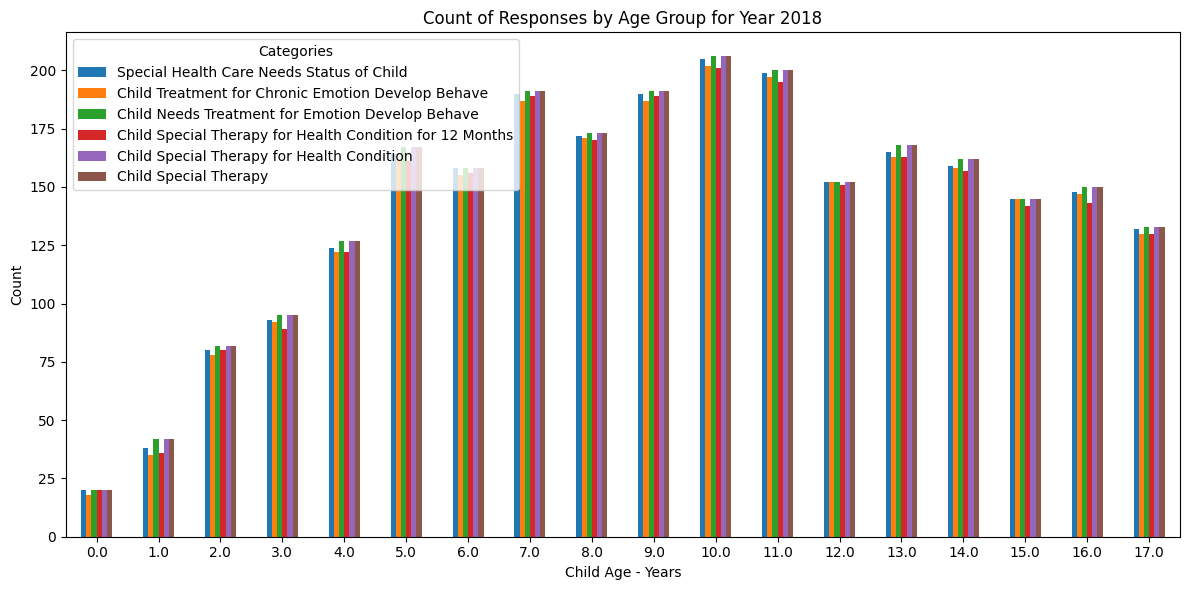

--- Survey Year: 2019 ---
                   Special Health Care Needs Status of Child  \
Child Age - Years                                              
0.0                                                       20   
1.0                                                       25   
2.0                                                       79   
3.0                                                       98   
4.0                                                      133   
5.0                                                      143   
6.0                                                      169   
7.0                                                      162   
8.0                                                      197   
9.0                                                      207   
10.0                                                     197   
11.0                                                     196   
12.0                                                     155   
13.0          

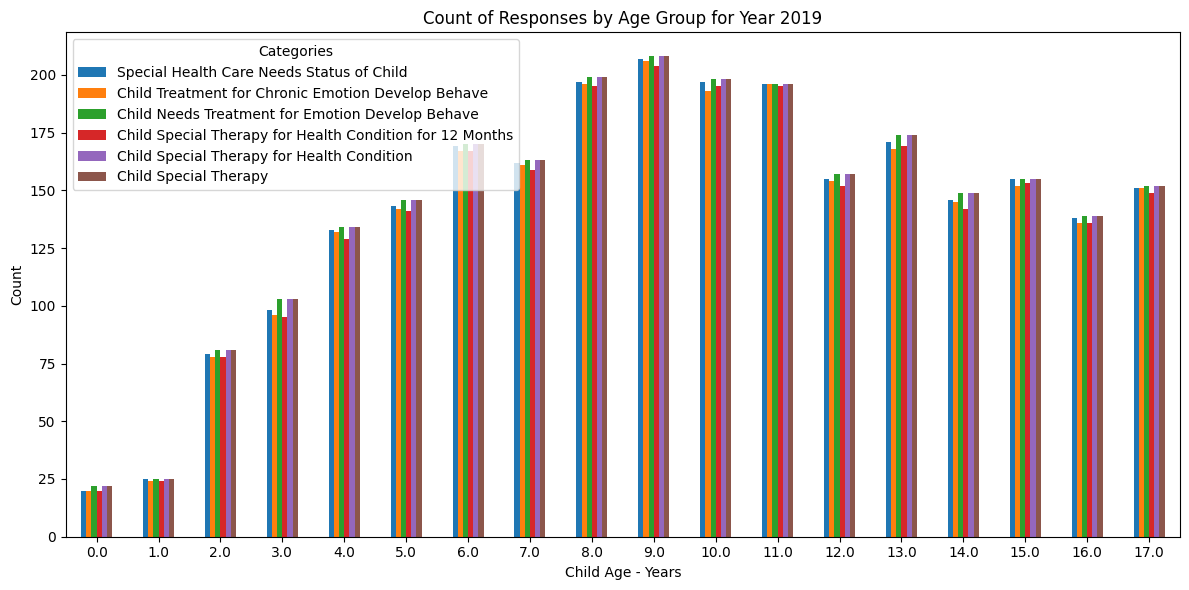

--- Survey Year: 2020 ---
                   Special Health Care Needs Status of Child  \
Child Age - Years                                              
0.0                                                       18   
1.0                                                       41   
2.0                                                      138   
3.0                                                      132   
4.0                                                      195   
5.0                                                      219   
6.0                                                      245   
7.0                                                      249   
8.0                                                      285   
9.0                                                      286   
10.0                                                     254   
11.0                                                     270   
12.0                                                     243   
13.0          

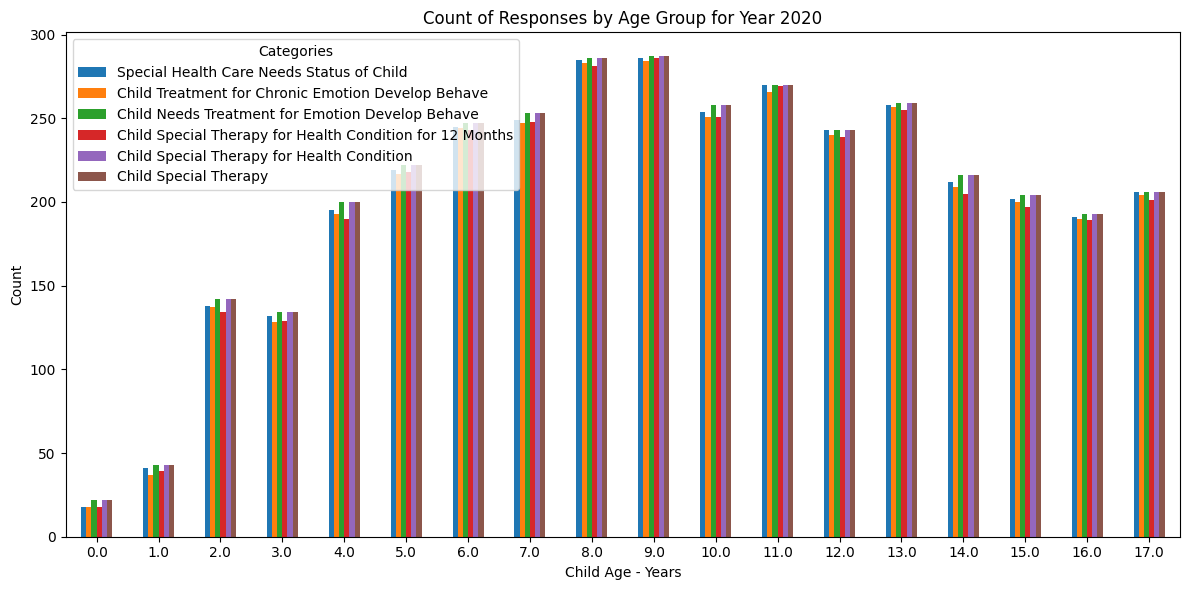

--- Survey Year: 2021 ---
                   Special Health Care Needs Status of Child  \
Child Age - Years                                              
0.0                                                       32   
1.0                                                       77   
2.0                                                      222   
3.0                                                      274   
4.0                                                      370   
5.0                                                      426   
6.0                                                      327   
7.0                                                      335   
8.0                                                      330   
9.0                                                      393   
10.0                                                     297   
11.0                                                     290   
12.0                                                     263   
13.0          

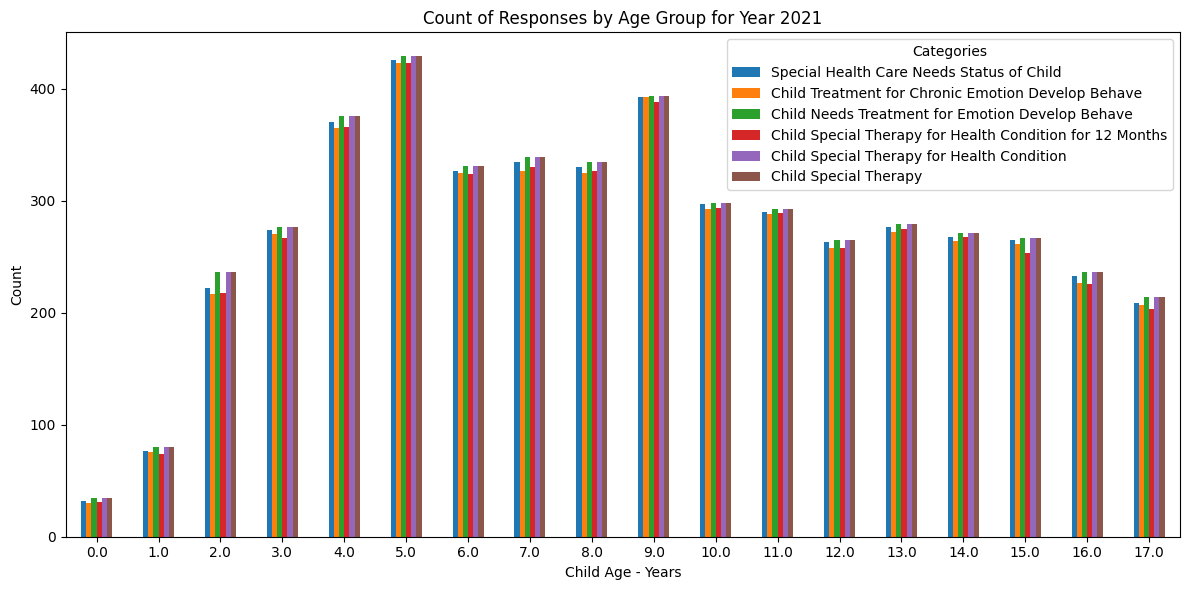

--- Survey Year: 2022 ---
                   Special Health Care Needs Status of Child  \
Child Age - Years                                              
0.0                                                       39   
1.0                                                       76   
2.0                                                      226   
3.0                                                      323   
4.0                                                      406   
5.0                                                      427   
6.0                                                      406   
7.0                                                      409   
8.0                                                      422   
9.0                                                      417   
10.0                                                     354   
11.0                                                     345   
12.0                                                     343   
13.0          

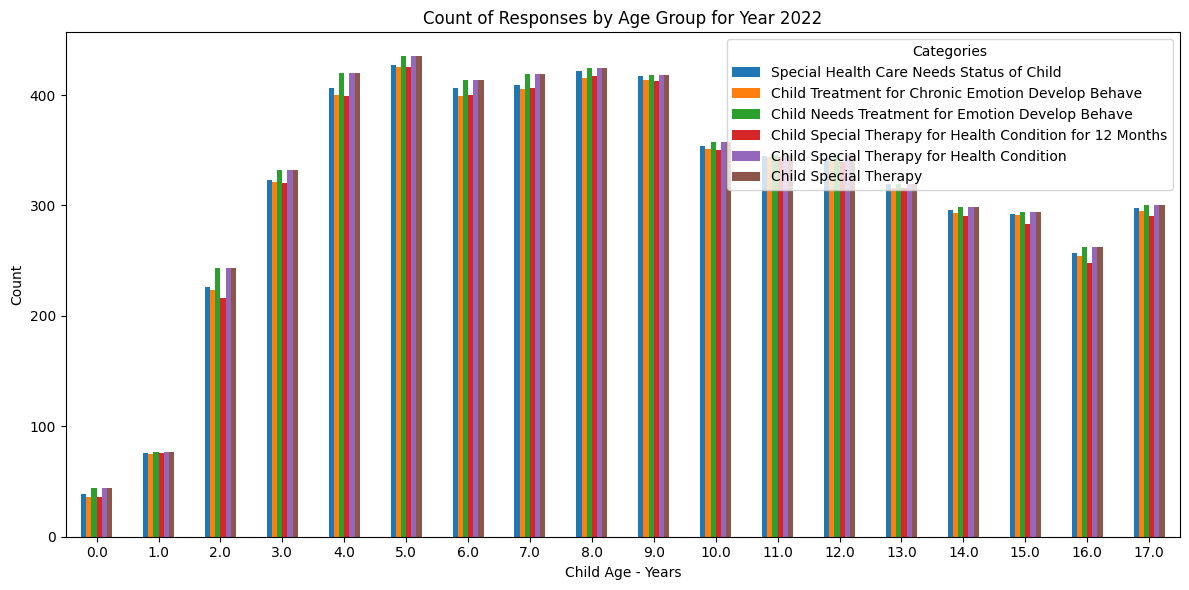

--- Survey Year: 2023 ---
                   Special Health Care Needs Status of Child  \
Child Age - Years                                              
0.0                                                       38   
1.0                                                       97   
2.0                                                      282   
3.0                                                      388   
4.0                                                      539   
5.0                                                      572   
6.0                                                      457   
7.0                                                      489   
8.0                                                      434   
9.0                                                      446   
10.0                                                     371   
11.0                                                     367   
12.0                                                     300   
13.0          

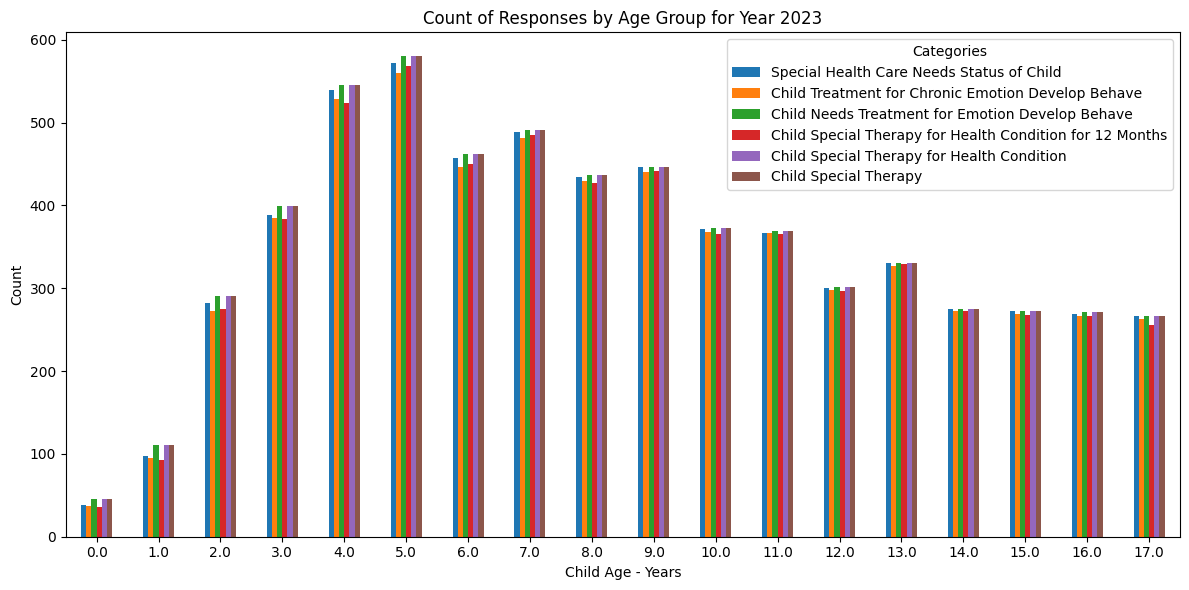

In [63]:
survey_years = NSCH_data['Survey Year'].unique()

for year in survey_years:
    print(f"--- Survey Year: {int(year)} ---")
    
    year_data = NSCH_data[NSCH_data['Survey Year'] == year]
    
    year_summary = {}
    
    for col in columns_of_interest:
        if col == 'Special Health Care Needs Status of Child':
            
            year_summary[col] = year_data[year_data[col] == 'Special Health Care Needs'].groupby('Child Age - Years').size()
        else:

            year_summary[col] = year_data[year_data[col] == 'Yes'].groupby('Child Age - Years').size()
    
    year_summary_df = pd.DataFrame(year_summary)
    
    print(year_summary_df)

    year_summary_df.plot(kind='bar', figsize=(12, 6))
    plt.title(f'Count of Responses by Age Group for Year {int(year)}')
    plt.xlabel('Child Age - Years')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.legend(title='Categories')
    plt.tight_layout()
    
    plt.show()

In [64]:
age_population = NSCH_data.groupby(['Survey Year', 'Child Age - Years']).size().unstack(fill_value=0)

# Find the age group with the largest population for each year
largest_population = age_population.idxmax(axis=1)
largest_count = age_population.max(axis=1)

# Create a DataFrame to display results
largest_population_df = pd.DataFrame({
    'Year': largest_population.index,
    'Largest Age Group': largest_population.values,
    'Count': largest_count.values
})

print(largest_population_df)

   Year  Largest Age Group  Count
0  2016                9.0    343
1  2017               11.0    141
2  2018               10.0    206
3  2019                9.0    208
4  2020                9.0    287
5  2021                5.0    429
6  2022                5.0    435
7  2023                5.0    580


In [65]:
data_2016 = NSCH_data[NSCH_data['Survey Year'] == 2016]
data_2023 = NSCH_data[NSCH_data['Survey Year'] == 2023]

summary_2016 = {col: data_2016[data_2016[col] == 'Yes'].groupby('Child Age - Years').size() for col in columns_of_interest}
summary_2016_df = pd.DataFrame(summary_2016).fillna(0)

summary_2023 = {col: data_2023[data_2023[col] == 'Yes'].groupby('Child Age - Years').size() for col in columns_of_interest}
summary_2023_df = pd.DataFrame(summary_2023).fillna(0)

increase_df = summary_2023_df - summary_2016_df

max_increase = increase_df.idxmax()
max_values = increase_df.max()

result = pd.DataFrame({
    'Age Group': max_increase,
    'Max Increase': max_values
})

print(result)

                                                    Age Group  Max Increase
Special Health Care Needs Status of Child                 0.0           0.0
Child Treatment for Chronic Emotion Develop Behave        5.0         353.0
Child Needs Treatment for Emotion Develop Behave          5.0         370.0
Child Special Therapy for Health Condition for ...        5.0         364.0
Child Special Therapy for Health Condition                5.0         370.0
Child Special Therapy                                     5.0         370.0


In [66]:
percentage_increase_df = ((summary_2023_df - summary_2016_df) / summary_2016_df.replace(0, pd.NA)) * 100

# Find the age group with the largest percentage increase for each category
max_percentage_increase = percentage_increase_df.idxmax()
max_percentage_values = percentage_increase_df.max()

# Combine results
result_percentage = pd.DataFrame({
    'Age Group': max_percentage_increase,
    'Max Percentage Increase': max_percentage_values
})

print(result_percentage)

                                                    Age Group  \
Special Health Care Needs Status of Child                 NaN   
Child Treatment for Chronic Emotion Develop Behave        4.0   
Child Needs Treatment for Emotion Develop Behave          4.0   
Child Special Therapy for Health Condition for ...        5.0   
Child Special Therapy for Health Condition                4.0   
Child Special Therapy                                     4.0   

                                                   Max Percentage Increase  
Special Health Care Needs Status of Child                             None  
Child Treatment for Chronic Emotion Develop Behave              182.352941  
Child Needs Treatment for Emotion Develop Behave                178.061224  
Child Special Therapy for Health Condition for ...              178.431373  
Child Special Therapy for Health Condition                      178.061224  
Child Special Therapy                                           178.061224  


/var/folders/m9/nwvp3yqj5f76trygypnkypv80000gp/T/ipykernel_4034/2774181932.py:4: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_percentage_increase = percentage_increase_df.idxmax()


In [67]:
data_2017 = NSCH_data[NSCH_data['Survey Year'] == 2017]
data_2023 = NSCH_data[NSCH_data['Survey Year'] == 2023]

summary_2017 = {col: data_2017[data_2017[col] == 'Yes'].groupby('Child Age - Years').size() for col in columns_of_interest}
summary_2017_df = pd.DataFrame(summary_2017).fillna(0)

summary_2023 = {col: data_2023[data_2023[col] == 'Yes'].groupby('Child Age - Years').size() for col in columns_of_interest}
summary_2023_df = pd.DataFrame(summary_2023).fillna(0)

percentage_increase_df = ((summary_2023_df - summary_2017_df) / summary_2017_df.replace(0, pd.NA)) * 100

# Find the age group with the largest percentage increase for each category
max_percentage_increase = percentage_increase_df.idxmax()
max_percentage_values = percentage_increase_df.max()

# Combine results
result_percentage = pd.DataFrame({
    'Age Group': max_percentage_increase,
    'Max Percentage Increase': max_percentage_values
})

print(result_percentage)

                                                    Age Group  \
Special Health Care Needs Status of Child                 NaN   
Child Treatment for Chronic Emotion Develop Behave        5.0   
Child Needs Treatment for Emotion Develop Behave          4.0   
Child Special Therapy for Health Condition for ...        5.0   
Child Special Therapy for Health Condition                4.0   
Child Special Therapy                                     4.0   

                                                   Max Percentage Increase  
Special Health Care Needs Status of Child                             None  
Child Treatment for Chronic Emotion Develop Behave              471.428571  
Child Needs Treatment for Emotion Develop Behave                 461.85567  
Child Special Therapy for Health Condition for ...              479.591837  
Child Special Therapy for Health Condition                       461.85567  
Child Special Therapy                                            461.85567  


/var/folders/m9/nwvp3yqj5f76trygypnkypv80000gp/T/ipykernel_4034/939397108.py:13: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_percentage_increase = percentage_increase_df.idxmax()


In [70]:
gender_population = NSCH_data.groupby(['Survey Year', 'Child Sex']).size().unstack(fill_value=0)
gender_population.columns = ['Female', 'Male']
rate_of_increase = gender_population.pct_change() * 100

print(gender_population)
print(rate_of_increase)

             Female  Male
Survey Year              
2016           1395  2761
2017            622  1188
2018            866  1696
2019            857  1714
2020           1238  2447
2021           1674  3281
2022           1954  3795
2023           2173  4095
                Female       Male
Survey Year                      
2016               NaN        NaN
2017        -55.412186 -56.972112
2018         39.228296  42.760943
2019         -1.039261   1.061321
2020         44.457410  42.765461
2021         35.218094  34.082550
2022         16.726404  15.665956
2023         11.207779   7.905138


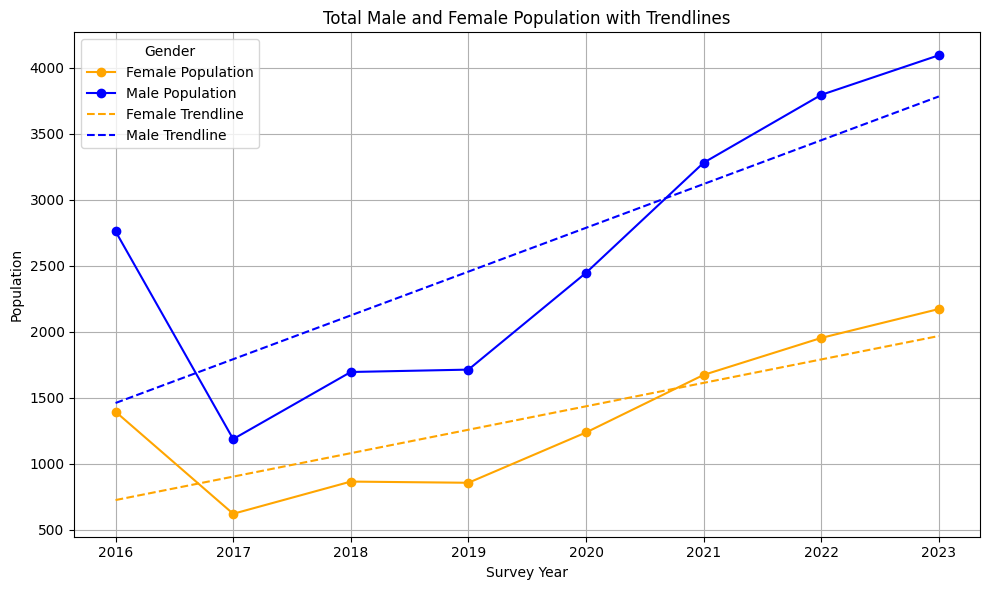

Total increase rate for females: 55.77%
Total increase rate for males: 48.32%


In [71]:
years = np.array(gender_population.index).reshape(-1, 1)

female_population = gender_population['Female'].values
female_model = LinearRegression()
female_model.fit(years, female_population)
female_trendline = female_model.predict(years)

male_population = gender_population['Male'].values
male_model = LinearRegression()
male_model.fit(years, male_population)
male_trendline = male_model.predict(years)

plt.figure(figsize=(10, 6))

plt.plot(years, female_population, 'o-', label='Female Population', color='orange')
plt.plot(years, male_population, 'o-', label='Male Population', color='blue')

plt.plot(years, female_trendline, '--', label='Female Trendline', color='orange')
plt.plot(years, male_trendline, '--', label='Male Trendline', color='blue')

plt.title('Total Male and Female Population with Trendlines')
plt.xlabel('Survey Year')
plt.ylabel('Population')
plt.legend(title='Gender')
plt.grid(True)
plt.tight_layout()

plt.show()

female_total_increase_rate = ((female_population[-1] - female_population[0]) / female_population[0]) * 100

male_total_increase_rate = ((male_population[-1] - male_population[0]) / male_population[0]) * 100

print(f"Total increase rate for females: {female_total_increase_rate:.2f}%")
print(f"Total increase rate for males: {male_total_increase_rate:.2f}%")

